In [ ]:
!pip install kaplanmeier

     |████████████████████████████████| 348kB 8.5MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp36-none-any.whl size=4035 sha256=369fb39abb5e99293bc93821fe04c565241b02356ae05c3acca8c4ac5e6ce32a
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


In [ ]:
import pandas as pd
import matplotlib.pyplot as plots
import numpy as np
import scipy.stats as s
import kaplanmeier

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
officer_df = pd.read_csv("/content/drive/MyDrive/Fair Policing in Chicago DS3 Project/data/officer-profiles.csv.gz")
officer_df.sort_values(by=['resignation_date'],ascending=False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UID,first_name,last_name,middle_initial,middle_initial2,suffix_name,birth_year,race,gender,appointed_date,resignation_date,current_status,current_star,current_unit,current_rank,start_date,org_hire_date,profile_count,cleaned_rank,link_UID
33606,133607,RAPHAEL,O BRYANT,NaN,NaN,NaN,NaN,BLACK,MALE,2017-09-18,2017-09-17,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,33617.0
16037,116038,JUAN,MENDOZA,A,NaN,JR,1954.0,ASIAN/PACIFIC ISLANDER,MALE,1999-07-12,2017-08-24,1.0,17526.0,2.0,POLICE OFFICER,1999-07-12,1999-07-12,9,POLICE OFFICER,18832.0
10282,110283,HAROLD,JENKINS,W,NaN,NaN,1954.0,BLACK,MALE,1999-07-12,2017-08-19,1.0,16408.0,5.0,POLICE OFFICER,1999-07-12,1999-07-12,6,POLICE OFFICER,13395.0
23327,123328,QUINTON,HANKS,T,NaN,NaN,1954.0,BLACK,MALE,1998-10-13,2017-08-19,1.0,18446.0,2.0,POLICE OFFICER,1998-10-13,1998-10-13,11,POLICE OFFICER,11311.0
2120,102121,BEN,TORRES,NaN,NaN,NaN,1965.0,HISPANIC,MALE,1997-07-07,2017-08-15,1.0,7262.0,19.0,POLICE OFFICER,1997-07-07,1989-11-08,7,POLICE OFFICER,28750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33688,133689,NaN,NaN,L,NaN,NaN,1963.0,NaN,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,NaN,1,NaN,33699.0
33689,133690,NaN,NaN,NaN,NaN,NaN,1951.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0,NaN,NaN,NaN,1,NaN,33700.0
33690,133691,NaN,NaN,L,NaN,NaN,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,1,NaN,33701.0
33691,133692,NaN,NaN,P,NaN,NaN,1954.0,NaN,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,NaN,1,NaN,33702.0


In [ ]:
# Data Cleaning - Removing unnecessary columns and null values

cleaned_cols = officer_df.loc[:, ["UID", "first_name", "last_name", "middle_initial", "race", "gender", "appointed_date", "resignation_date", "cleaned_rank"]]
officers_cleaned = cleaned_cols.loc[cleaned_cols.race.notnull() & cleaned_cols.appointed_date.notnull() & cleaned_cols.resignation_date.notnull() & cleaned_cols.last_name.notnull() & cleaned_cols.first_name.notnull()]
officers_cleaned

,UID,first_name,last_name,middle_initial,race,gender,appointed_date,resignation_date,cleaned_rank
0,100001,A,BRODERSON,F,WHITE,MALE,1950-06-03,1980-03-10,NaN
1,100002,A,DALESSANDRO,A,WHITE,MALE,1956-09-01,1979-10-18,NaN
2,100003,A,KIBURAS,J,WHITE,MALE,1968-06-24,1980-10-01,NaN
3,100004,A,KUSTRA,J,WHITE,MALE,1953-09-28,1980-10-01,NaN
4,100005,A,MC LAUGHLIN,R,BLACK,MALE,1966-06-20,1986-09-16,POLICE OFFICER
...,...,...,...,...,...,...,...,...,...
32513,132514,KEVIN,TAYLOR,NaN,BLACK,MALE,2007-11-01,2014-05-22,NaN
32514,132515,MERCEDES,WATSON,M,BLACK,FEMALE,2005-09-16,2011-01-21,NaN
32515,132516,DWIGHT,WHITE,A,BLACK,MALE,2007-11-01,2011-07-18,NaN
33055,133056,RONY,MAMMOO,D,WHITE,MALE,2017-11-16,2012-08-16,NaN


In [ ]:
# df checking only Race and Gender are not null

profiles_df = officer_df.loc[(officer_df.race.notnull()) & (officer_df.gender.notnull())]
real_white_list = profiles_df[profiles_df.race == "WHITE"]
real_black_list = profiles_df.loc[profiles_df.race == "BLACK"].race.tolist()
real_hispanic_list = profiles_df.loc[profiles_df.race == "HISPANIC"].race.tolist()
real_other_list = profiles_df.loc[(profiles_df.race != "HISPANIC") & (profiles_df.race != "BLACK") & (profiles_df.race != "WHITE")].race.tolist()

real_male_list = profiles_df[profiles_df.gender == "MALE"]
real_female_list = profiles_df[profiles_df.gender == "FEMALE"]

profiles_df

,UID,first_name,last_name,middle_initial,middle_initial2,suffix_name,birth_year,race,gender,appointed_date,resignation_date,current_status,current_star,current_unit,current_rank,start_date,org_hire_date,profile_count,cleaned_rank,link_UID
0,100001,A,BRODERSON,F,NaN,NaN,1926.0,WHITE,MALE,1950-06-03,1980-03-10,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,2863.0
1,100002,A,DALESSANDRO,A,NaN,NaN,1923.0,WHITE,MALE,1956-09-01,1979-10-18,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,6100.0
2,100003,A,KIBURAS,J,NaN,NaN,1948.0,WHITE,MALE,1968-06-24,1980-10-01,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,14560.0
3,100004,A,KUSTRA,J,NaN,NaN,1923.0,WHITE,MALE,1953-09-28,1980-10-01,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,15445.0
4,100005,A,MC LAUGHLIN,R,NaN,NaN,1941.0,BLACK,MALE,1966-06-20,1986-09-16,0.0,NaN,123.0,POLICE OFFICER,NaN,NaN,3,POLICE OFFICER,18373.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33666,133667,ROBERT,OLSZANSKI,,NaN,NaN,NaN,WHITE,MALE,2017-05-16,NaN,NaN,10348.0,NaN,NaN,NaN,NaN,1,NaN,33677.0
33667,133668,DEBBIE,ROBERSON,L,NaN,NaN,1955.0,BLACK,FEMALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,33678.0
33668,133669,JOHN,MACIEJEWSKI,A,NaN,NaN,1941.0,WHITE,MALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,33679.0
33669,133670,ROBIN,BELL,L,NaN,NaN,1965.0,BLACK,FEMALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,33680.0


In [ ]:
def years_as_officer(row):
    
    # Function that takes in a row as an input, and outputs the total time an officer has been working
    
    appointed_date = row['appointed_date']
    resigned_date = row['resignation_date']
    
    appointed_year = int(appointed_date[:4])
    appointed_month = int(appointed_date[5:7])
    appointed_day = int(appointed_date[8:10])
    
    resigned_year = int(resigned_date[:4])
    resigned_month = int(resigned_date[5:7])
    resigned_day = int(resigned_date[8:10])
    
    years = resigned_year - appointed_year
    months = years * 12
    
    days = 0
    if appointed_day == resigned_day:
        days = 1
    else:
        days = float(resigned_day + (31 - appointed_day)) / 31
    
    month_diff = resigned_month - appointed_month
    
    if month_diff >= 0 :
        months = months + month_diff - 1 + days
    else:
        years = years - 1
        months = years * 12
        months = (12 + months + month_diff)
        months = months - 1 + days
    return round((float(months) / 12), 2)

In [ ]:
officers_cleaned["years_served"] = officers_cleaned.apply(years_as_officer, axis = 1) 
# Applying function to df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_officers_cleaned = officers_cleaned.loc[officers_cleaned.years_served > 0] 
# Officers who served more than 0 days
new_officers_cleaned

,UID,first_name,last_name,middle_initial,race,gender,appointed_date,resignation_date,cleaned_rank,years_served
0,100001,A,BRODERSON,F,WHITE,MALE,1950-06-03,1980-03-10,NaN,29.77
1,100002,A,DALESSANDRO,A,WHITE,MALE,1956-09-01,1979-10-18,NaN,23.13
2,100003,A,KIBURAS,J,WHITE,MALE,1968-06-24,1980-10-01,NaN,12.27
3,100004,A,KUSTRA,J,WHITE,MALE,1953-09-28,1980-10-01,NaN,27.01
4,100005,A,MC LAUGHLIN,R,BLACK,MALE,1966-06-20,1986-09-16,POLICE OFFICER,20.24
...,...,...,...,...,...,...,...,...,...,...
32511,132512,CHRISTIAN,SHIU,K,ASIAN/PACIFIC ISLANDER,MALE,2007-11-01,2012-12-11,NaN,5.11
32512,132513,JAMES,STEWART,J,BLACK,MALE,2006-04-28,2010-02-27,NaN,3.83
32513,132514,KEVIN,TAYLOR,NaN,BLACK,MALE,2007-11-01,2014-05-22,NaN,6.56
32514,132515,MERCEDES,WATSON,M,BLACK,FEMALE,2005-09-16,2011-01-21,NaN,5.35


In [ ]:
# Separating officers from gender

female_officers = new_officers_cleaned.loc[new_officers_cleaned.gender == "FEMALE"]
male_officers = new_officers_cleaned.loc[new_officers_cleaned.gender == "MALE"]

female_list = female_officers.years_served.tolist()
male_list = male_officers.years_served.tolist()

female_series = pd.Series(female_list)
male_series = pd.Series(male_list)

Male Officer Statistics:
count    16926.000000
mean        26.429930
std          9.196713
min          1.000000
25%         23.000000
50%         29.000000
75%         32.000000
max         46.000000
dtype: float64


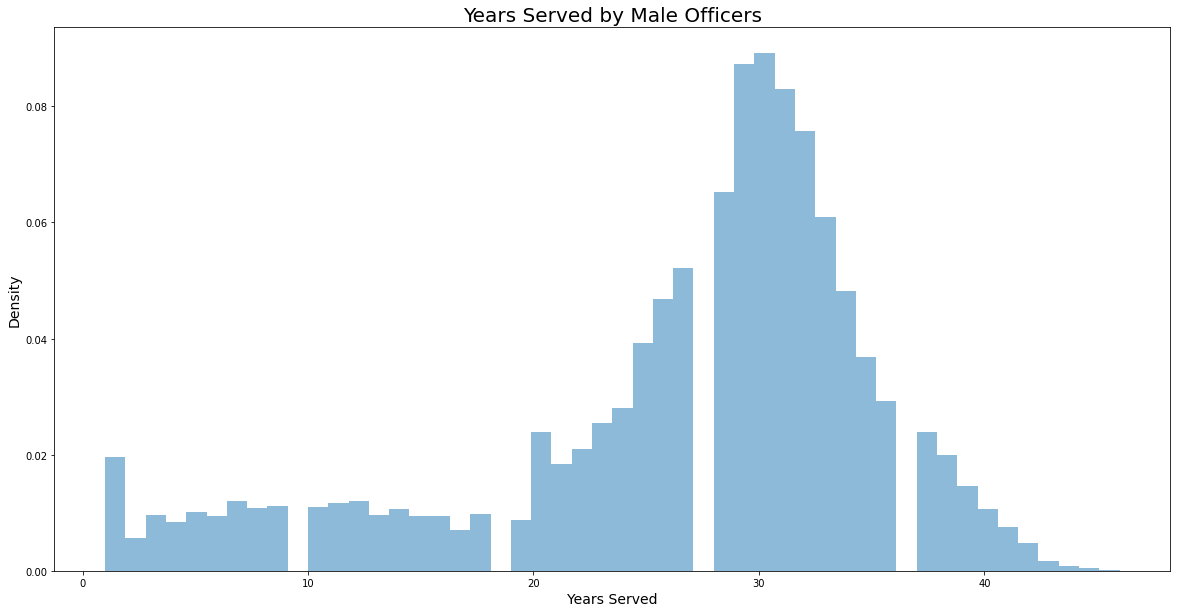

In [ ]:
# Histogram of Years Served by Male Officers

print('\033[1m' + "Male Officer Statistics:" + "\033[0;0m")
print(male_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(male_list, density = True, alpha = .5, color = 'tab:blue', bins = 50, label = "Male")
plots.title("Years Served by Male Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

Female Officer Statistics:
count    2483.000000
mean       19.285139
std         9.181931
min         1.000000
25%        13.000000
50%        21.000000
75%        26.000000
max        40.000000
dtype: float64


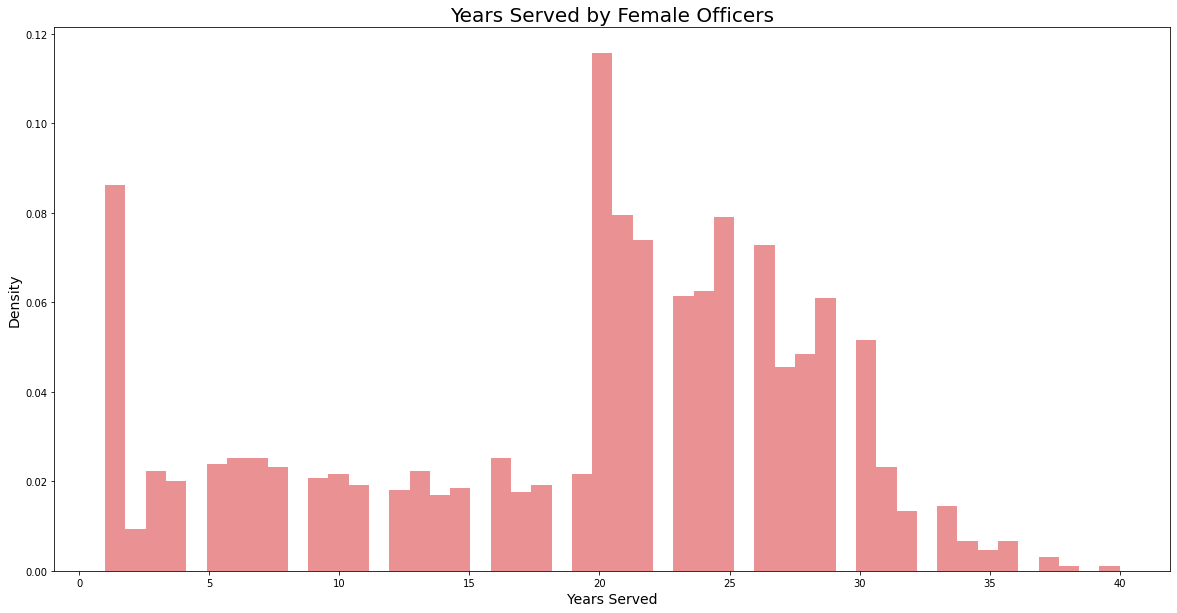

In [ ]:
# Histogram of Years Served by Female Officers

print('\033[1m' + "Female Officer Statistics:" + "\033[0;0m")
print(female_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(female_list, density = True, alpha = .5, color = 'tab:red', bins = 50, label = "Female")
plots.title("Years Served by Female Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

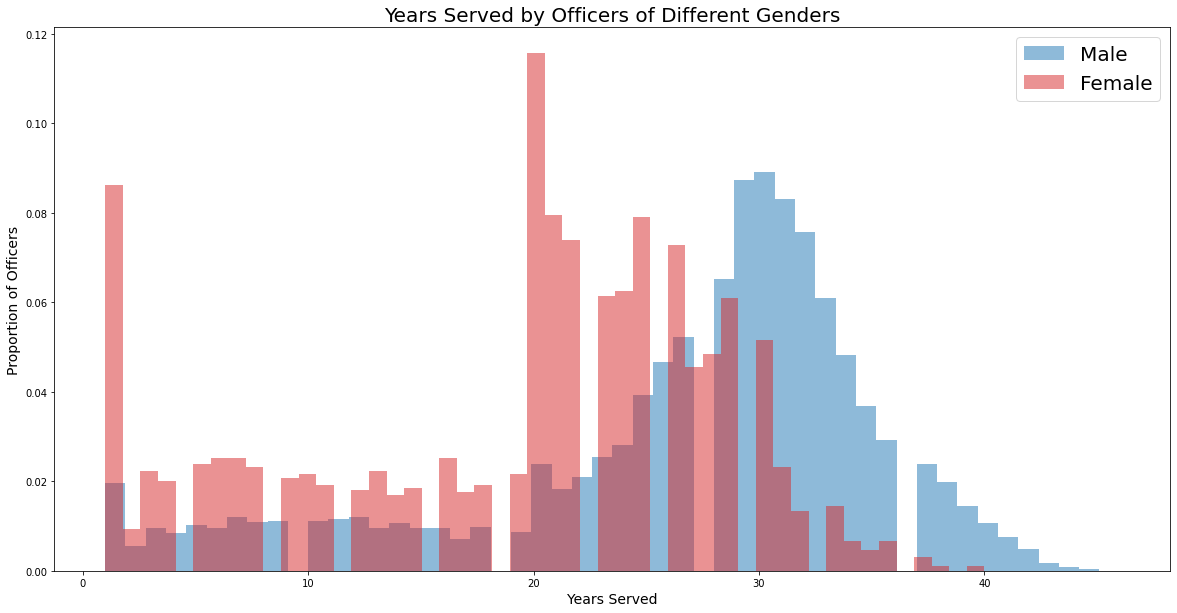

In [ ]:
# Overlayed Histogram of Years Served by Officers of Different Genders

plots.figure(figsize=(20, 10))
plots.hist(male_list, density = True, alpha = .5, color = 'tab:blue', bins = 50, label = "Male")
plots.hist(female_list, density = True, alpha = .5, color = 'tab:red', bins = 50, label = "Female")
plots.legend(loc = "upper right", prop={'size': 20})
plots.title("Years Served by Officers of Different Genders", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Proportion of Officers", size = 14)
plots.savefig('overlayed_gender.png', dpi=300, bbox_inches='tight')
plots.show()

In [ ]:
max(female_list)

40

In [ ]:
max(male_list)

46

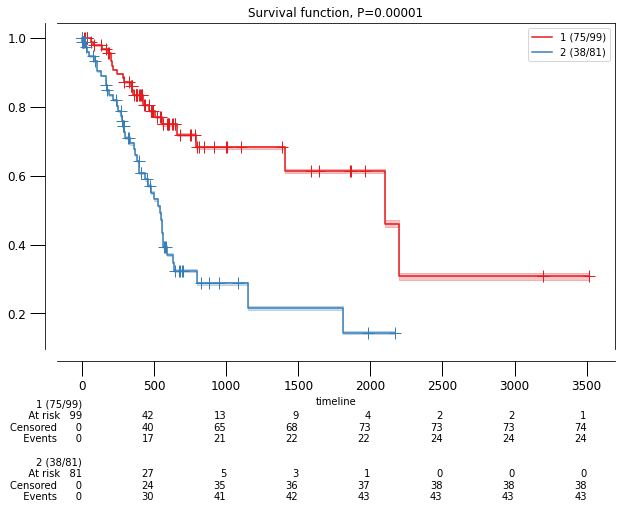

In [ ]:
df = km.example_data()
time_event=df['time']
censoring=df['Died'] 
labx=df['group']

# Compute survival
out=km.fit(time_event, censoring, labx)
km.plot(out)

In [ ]:
df

,time,Died,group
0,485,0,1
1,526,1,2
2,588,1,2
3,997,0,1
4,426,1,1
...,...,...,...
175,183,0,1
176,3196,0,1
177,457,1,2
178,2100,1,1


In [ ]:
km = new_officers_cleaned[["UID", "gender", "years_served"]]
km['event'] = 1
km

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,UID,gender,years_served,event
0,100001,MALE,29.77,1
1,100002,MALE,23.13,1
2,100003,MALE,12.27,1
3,100004,MALE,27.01,1
4,100005,MALE,20.24,1
...,...,...,...,...
32511,132512,MALE,5.11,1
32512,132513,MALE,3.83,1
32513,132514,MALE,6.56,1
32514,132515,FEMALE,5.35,1


In [ ]:
km.sort_values(by=['UID'])
km.reset_index(inplace=True)
km.head(10)

,index,UID,gender,years_served,event
0,0,100001,MALE,29.77,1
1,1,100002,MALE,23.13,1
2,2,100003,MALE,12.27,1
3,3,100004,MALE,27.01,1
4,4,100005,MALE,20.24,1
5,5,100006,MALE,32.39,1
6,19,100020,MALE,10.35,1
7,21,100022,MALE,22.07,1
8,22,100023,MALE,30.13,1
9,23,100024,MALE,8.56,1


In [ ]:
kaplan_df = pd.DataFrame(columns=['UID', 'gender', 'years_served', 'event'])
for i in range(len(km)):
    # takes values from each officer and creates rows
    years_served = km.loc[i].years_served 
    uid = km.loc[i].UID
    gender = km.loc[i].gender
    for j in range(years_served_row - 1):
        new_row = {'UID': uid, 
                   'gender': gender,
                   'years_served': j,
                   'event': 0}
        kaplan_df = kaplan_df.append(new_row, ignore_index = True)

    new_row = {'UID': uid_row,
               'gender': gender_row,
               'years_served': years_served,
               'event': 1}
    kaplan_df = kaplan_df.append(new_row, ignore_index = True)
    print(i)
kaplan_df



Streaming output truncated to the last 5000 lines.
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
14466
14467
14468
14469
14470
14471
14472
14473
14474
14475
14476
14477
14478
14479
14480
14481
14482
14483
14484
14485
14486
14487
14488
14489
14490
14491
14492
14493
14494
14495
14496
14497
14498
14499
14500
14501
14502
14503
14504
14505
14506
14507
14508
14509
14510
14511
14512
14513
14514
14515
14516
14517
14518
14519
14520
14521
14522
14523
14524
14525
14526
14527
14528
14529
14530
14531
14532
14533
14534
14535
14536
14537
14538
14539
14540
14541
14542
14543
14544
14545
14546
14547
14548
14549
14550
14551
14552
14553
14554
14555
14556
14557
14558
14559
14560
14561
14562
14563
14564
14565
14566
1

,UID,gender,years_served,event
0,100001,MALE,0,0
1,100001,MALE,1,0
2,100001,MALE,2,0
3,100001,MALE,3,0
4,100001,MALE,4,0
...,...,...,...,...
621083,132516,MALE,27,0
621084,132516,MALE,28,0
621085,132516,MALE,29,0
621086,132516,MALE,30,0


In [ ]:
kaplan_csv = kaplan_df.to_csv('Kaplan.csv', index = True)

In [ ]:
km.head(10)

,UID,gender,years_served,event
0,100001,MALE,30,0
1,100002,MALE,23,0
2,100003,MALE,12,0
3,100004,MALE,27,0
4,100005,MALE,20,0
5,100006,MALE,32,0
19,100020,MALE,10,0
21,100022,MALE,22,0
22,100023,MALE,30,0
23,100024,MALE,9,0


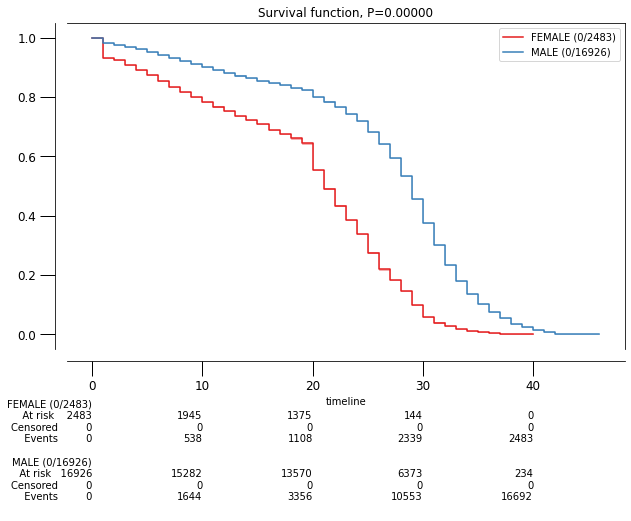

In [ ]:
#rounded to the nearest year
time_event=km['years_served']
censoring=km['event'] 
labx=km['gender']

# Compute survival
out=kaplanmeier.fit(time_event, censoring, labx)
kaplanmeier.plot(out)

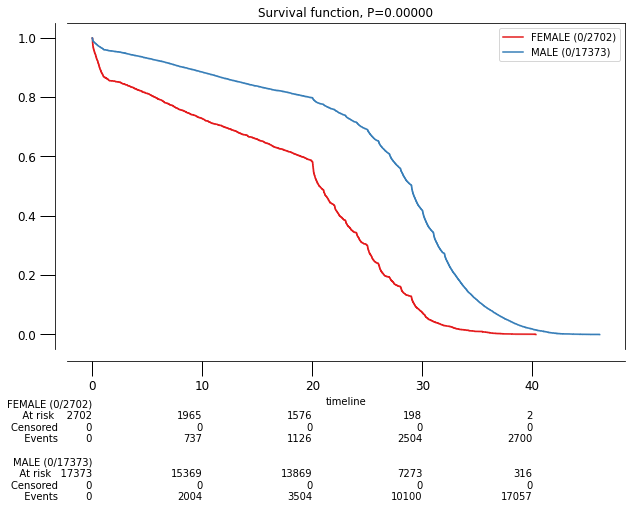

In [ ]:
#unrounded years served
time_event=km['years_served']
censoring=km['event'] 
labx=km['gender']

# Compute survival
out=kaplanmeier.fit(time_event, censoring, labx)
kaplanmeier.plot(out)